# Statistical Analysis of report

## Load report

In [3]:
import utils
import numpy as np
directory = r'C:\Users\s3628075\Study\Fujisaki\DataBase\enterface\All/'
report = utils.load_obj(directory+'Fujisaki_Params.pkl')
fnames, params = zip(*report.items())
fnames = np.array(fnames)
Fb = a = b = I = J = Aa_all = Ap_all = np.empty(1)
for p in params:
    Fb= np.append(Fb, p['Fb'])
    a = np.append(a, p['a'])
    b = np.append(b, p['b'])
    I = np.append(I, p['I'])
    J = np.append(J, p['J'])
    Aa_all = np.append(Aa_all, p['Aa'])
    Ap_all = np.append(Ap_all, p['Ap'])
print("Loading report completed")

Loading report completed


## Look at how parameters are distributed across the whole corpus

Aa length: 5222; min_value: -3.6719; max_value: 9.0
Ap length: 1515; min_value: 0.0; max_value: 9.0


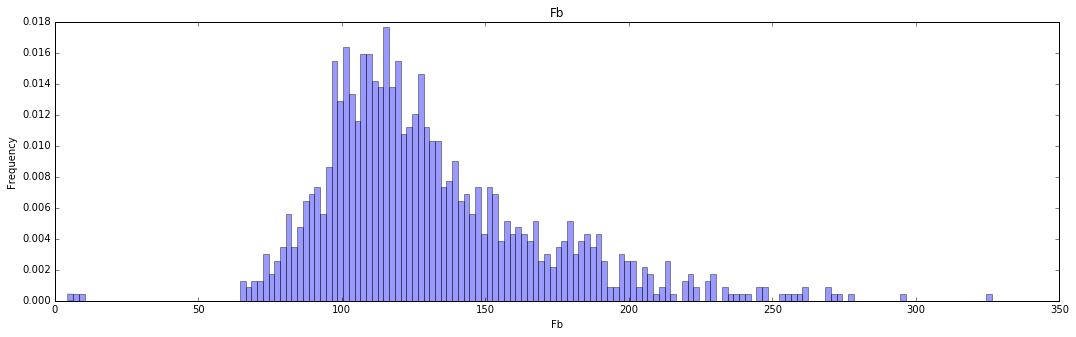

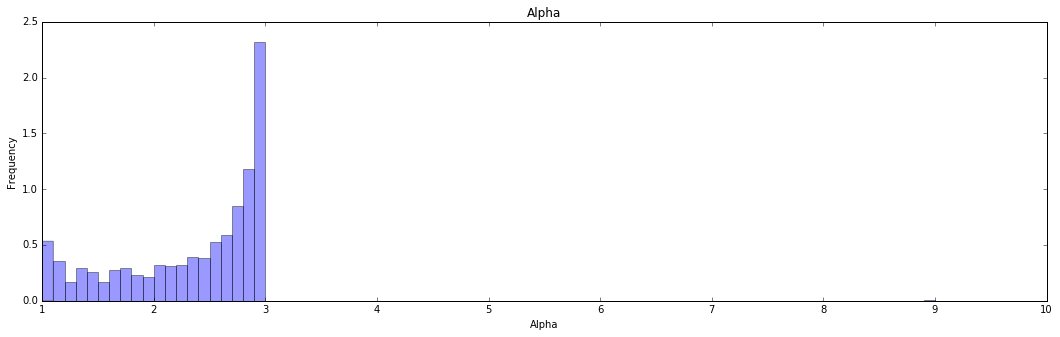

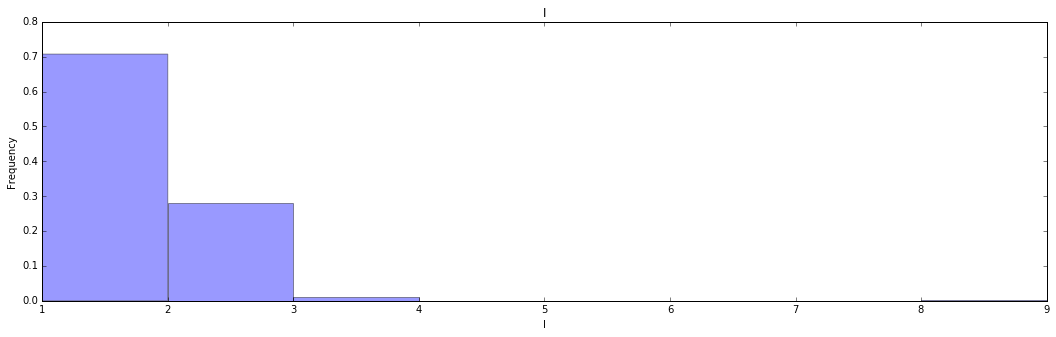

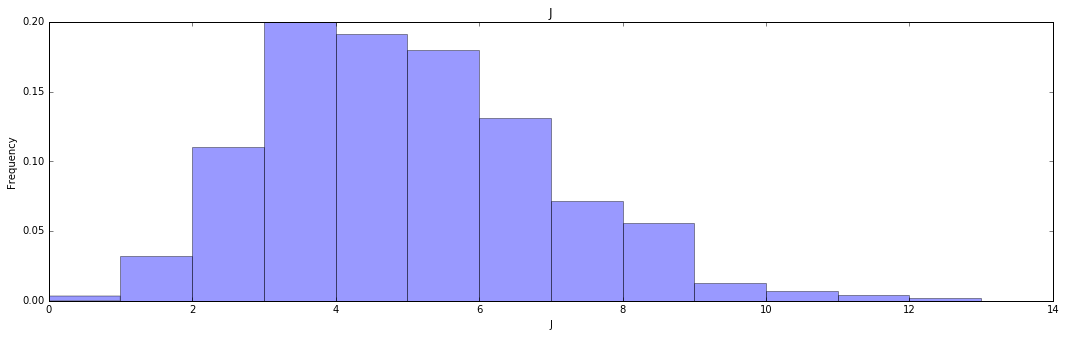

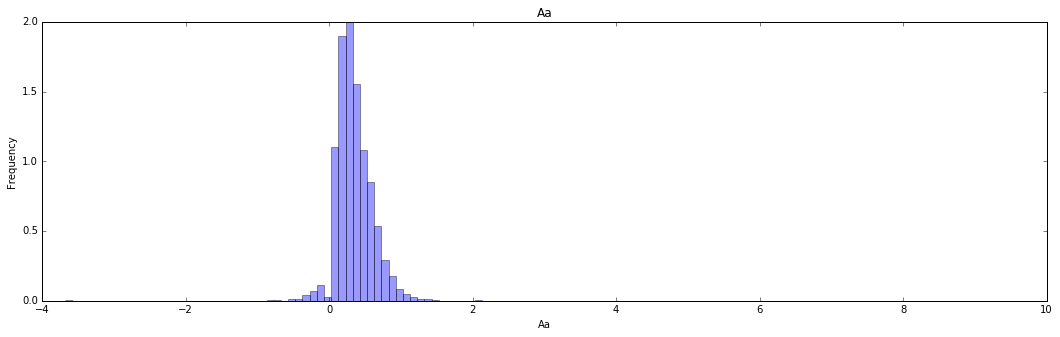

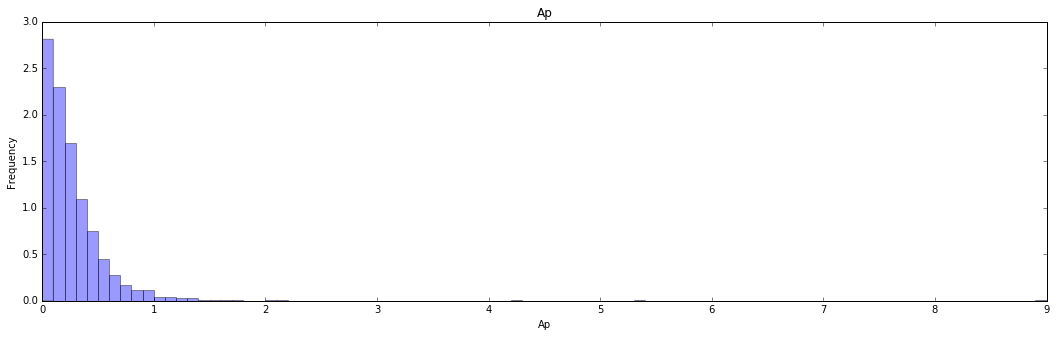

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
# plot Fb
hFb = utils.plot_hist(Fb, "Fb", 2.0)
# plot a
ha = utils.plot_hist(a, "Alpha", 0.1)
# plot I
hI = utils.plot_hist(I, "I", 1.0)
# plot J
hJ = utils.plot_hist(J, "J", 1.0)
# plot Aa
hAa = utils.plot_hist(Aa_all, "Aa", 0.1, verbose=True)
# plot Ap
hAp = utils.plot_hist(Ap_all, "Ap", 0.1, verbose=True)
plt.show()

## Explore synthesis error across emtions 

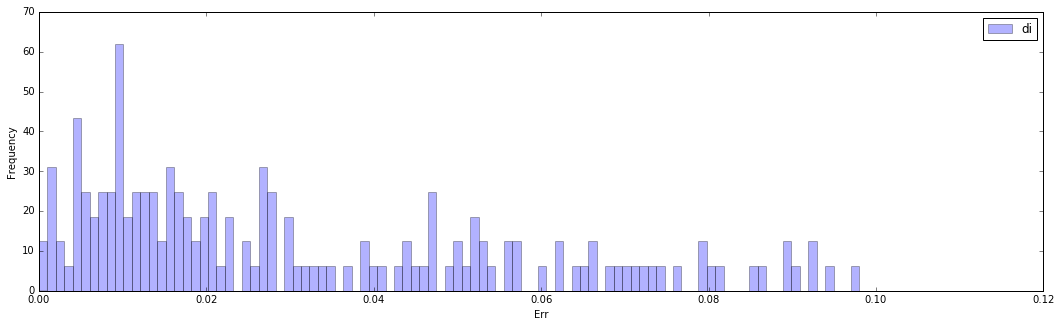

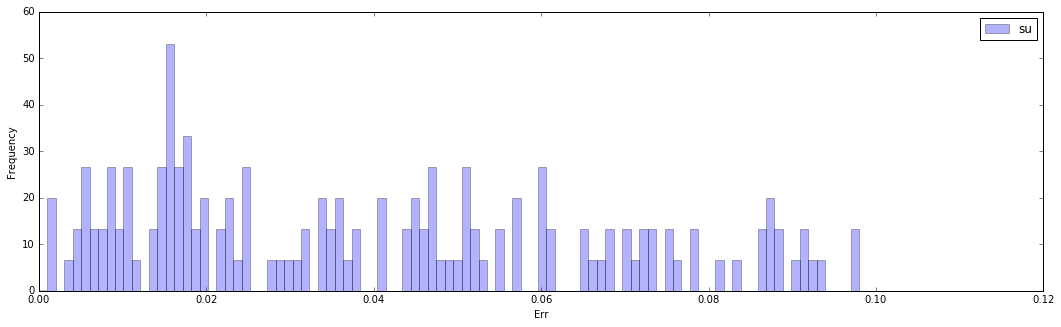

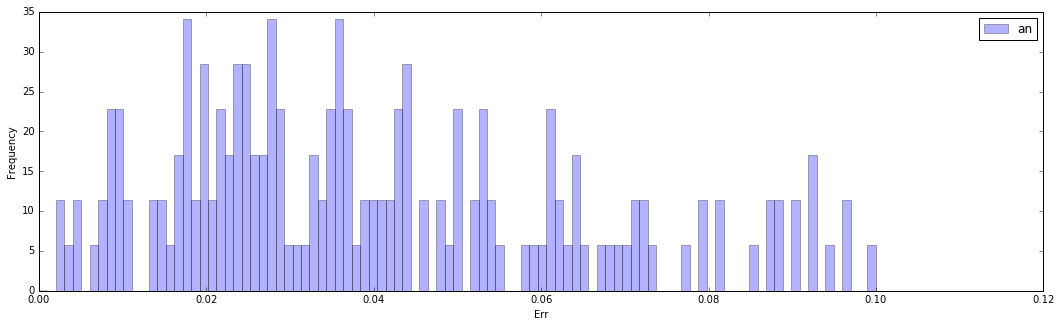

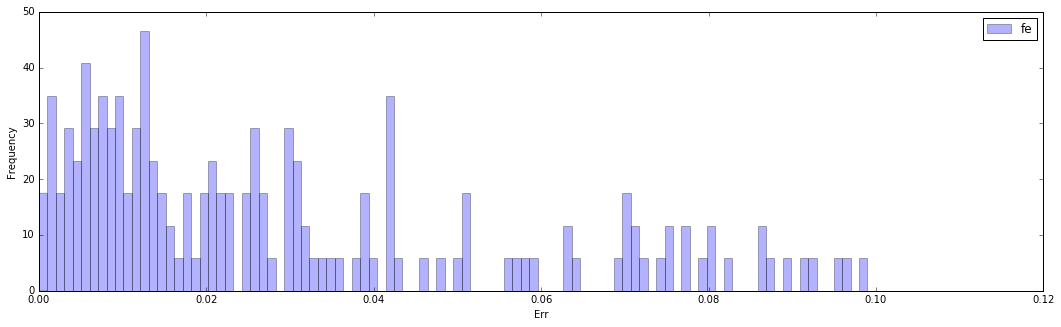

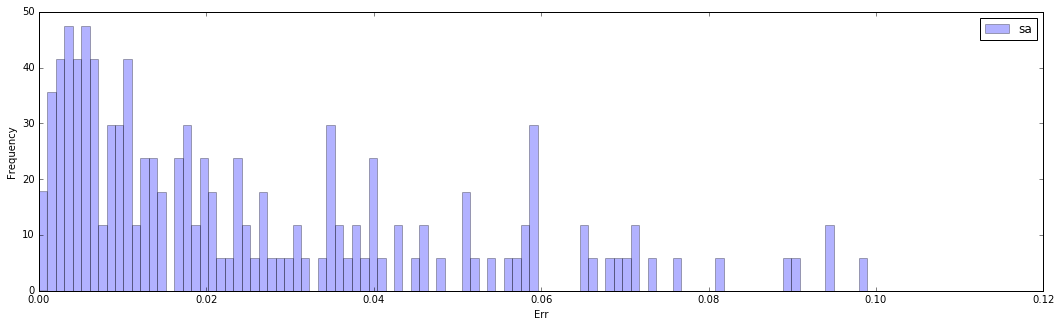

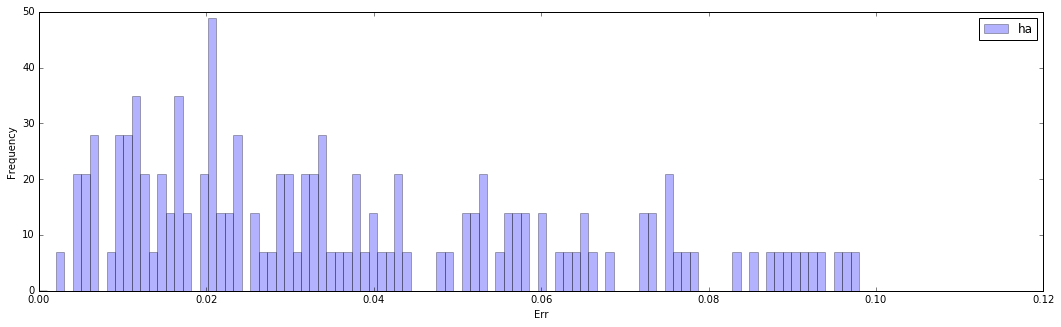

In [55]:
# load emotions.pkl and subjects.pkl utils.load_obj()

emotions = utils.load_obj(directory+'emotions.pkl')
subjects = utils.load_obj(directory+'subjects.pkl')
rmse = utils.load_obj(directory+'RMSE.pkl')

bins = np.linspace(0, 0.1, 100) 
for key in emotions.keys():
    plt.figure(figsize=(18,5))
    plt.hist(emotions[key], bins, alpha = 0.3, label=str(key), normed=True)
    plt.xlabel('Err')
    plt.ylabel('Frequency')
    plt.legend(loc = 'upper right')
    plt.show()

## Explore the sparsness of data

Data loaded successfully


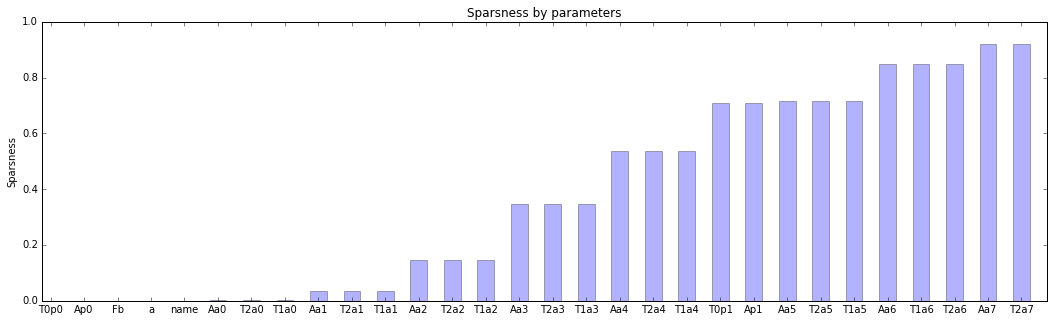

In [61]:
import pandas as pd
data = pd.DataFrame(utils.load_obj(directory+'fuj_params_data.pkl'))
print 'Data loaded successfully'

import operator
nan_fraction = {}
for c in list(data):
    nan_idx = pd.isnull(data[c])
    nan_fraction[c]=float(sum(nan_idx))/len(data)
params, fractions = zip(*sorted(nan_fraction.items(), key=operator.itemgetter(1)))
# take first 30 parameters
split = 30
left = np.arange(split)
fig, ax = plt.subplots(figsize=(18,5))
width = 0.5
ax.bar(left, fractions[:split], width, alpha = 0.3)
# add some text for labels, title and axes ticks
ax.set_ylabel('Sparsness')
ax.set_title('Sparsness by parameters')
ax.set_xticks(left + width / 2)
ax.set_xticklabels(params[:split])
plt.show()

## Explore distribution of data across emotions

Data loaded successfully


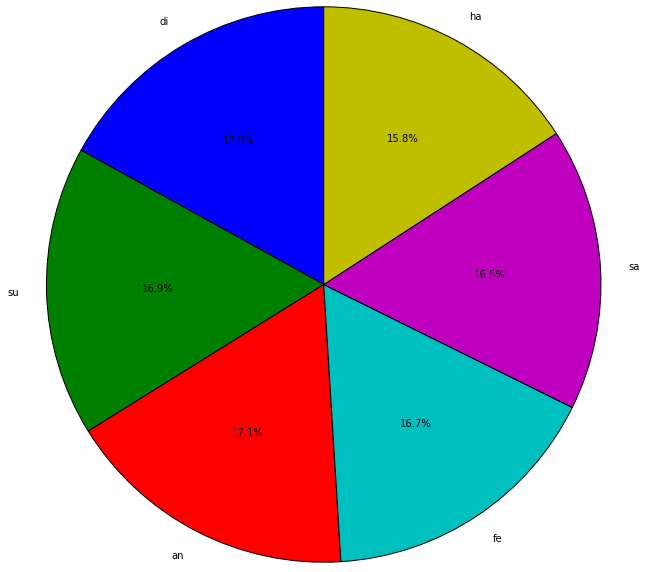

In [64]:
emotions = utils.load_obj(directory+'emotions.pkl')
print 'Data loaded successfully'

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = emotions.keys()
sizes = [len(emotions[e]) for e in emotions.keys()]

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# Explore Significant Features

Selected Features:  ['Aa0', 'Aa3', 'Aa1', 'Aa2', 'Aa4', 'Fb', 'Aa5', 'Ap0', 'T2a3', 'T1a3', 'T2a2', 'T2a6', 'T2a4', 'T2a0']


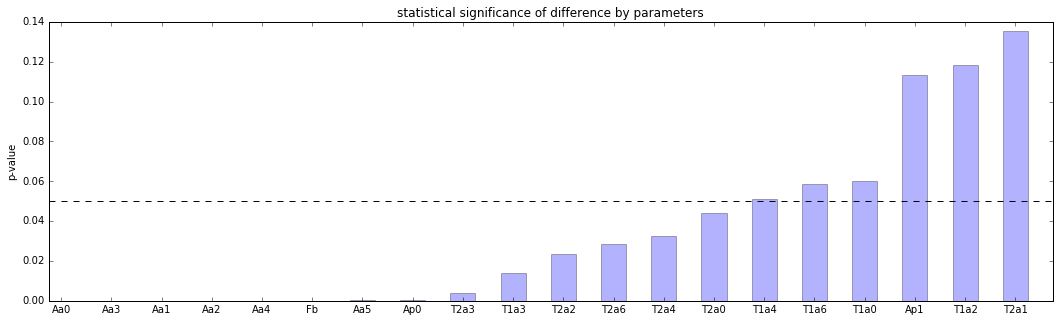

In [31]:
import stat_utils as st
anova = st.calc_anova(directory, verbose=False)

import operator
import matplotlib.pyplot as plt
params, anova_res = zip(*sorted(anova.items(), key=operator.itemgetter(1)))

thresh = 0.05
# take those parameters with p-values less than thresh=0.05
Idx = [ind for ind in range(len(anova_res)) if anova_res[ind] < thresh]
selected_features = [params[i] for i in Idx]
print 'Selected Features: ', selected_features
# take first 20 parameters
split = 20
left = np.arange(split)
fig, ax = plt.subplots(figsize=(18,5))
width = 0.5
ax.bar(left, anova_res[:split], width, alpha = 0.3)
# add some text for labels, title and axes ticks
ax.set_ylabel('p-value')
ax.set_title('statistical significance of difference by parameters')
ax.set_xticks(left + width / 2)
ax.set_xticklabels(params[:split])
plt.axhline(y=thresh, linewidth=1, color ='k', linestyle='--')
plt.show()
